In [138]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

from feature_extraction import feature
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_regression, SelectFromModel
from sklearn.feature_selection import f_regression
from sklearn.inspection import permutation_importance

In [139]:
df = pd.read_csv('city_united.csv')
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [140]:
df.shape

(187, 21)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

In [142]:
df.columns

Index(['UA_Name', 'UA_Country', 'UA_Continent', 'Housing', 'Cost of Living',
       'Startups', 'Venture Capital', 'Travel Connectivity', 'Commute',
       'Business Freedom', 'Safety', 'Healthcare', 'Education',
       'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
       'Leisure & Culture', 'Tolerance', 'Outdoors', 'Quality of Life Index'],
      dtype='object')

In [143]:
numerical = ['Housing', 'Cost of Living',
       'Startups', 'Venture Capital', 'Travel Connectivity', 'Commute',
       'Business Freedom', 'Safety', 'Healthcare', 'Education',
       'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
       'Leisure & Culture', 'Tolerance', 'Outdoors', 'Quality of Life Index']
catigorial = ['UA_Name','UA_Country','UA_Continent']

# Попробуем убрать категориальные данные и посмотреть, какой результат мы получим

In [144]:
x = df.drop(["Quality of Life Index",'UA_Name', 'UA_Country', 'UA_Continent'], axis=1)
y = df[["Quality of Life Index"]]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

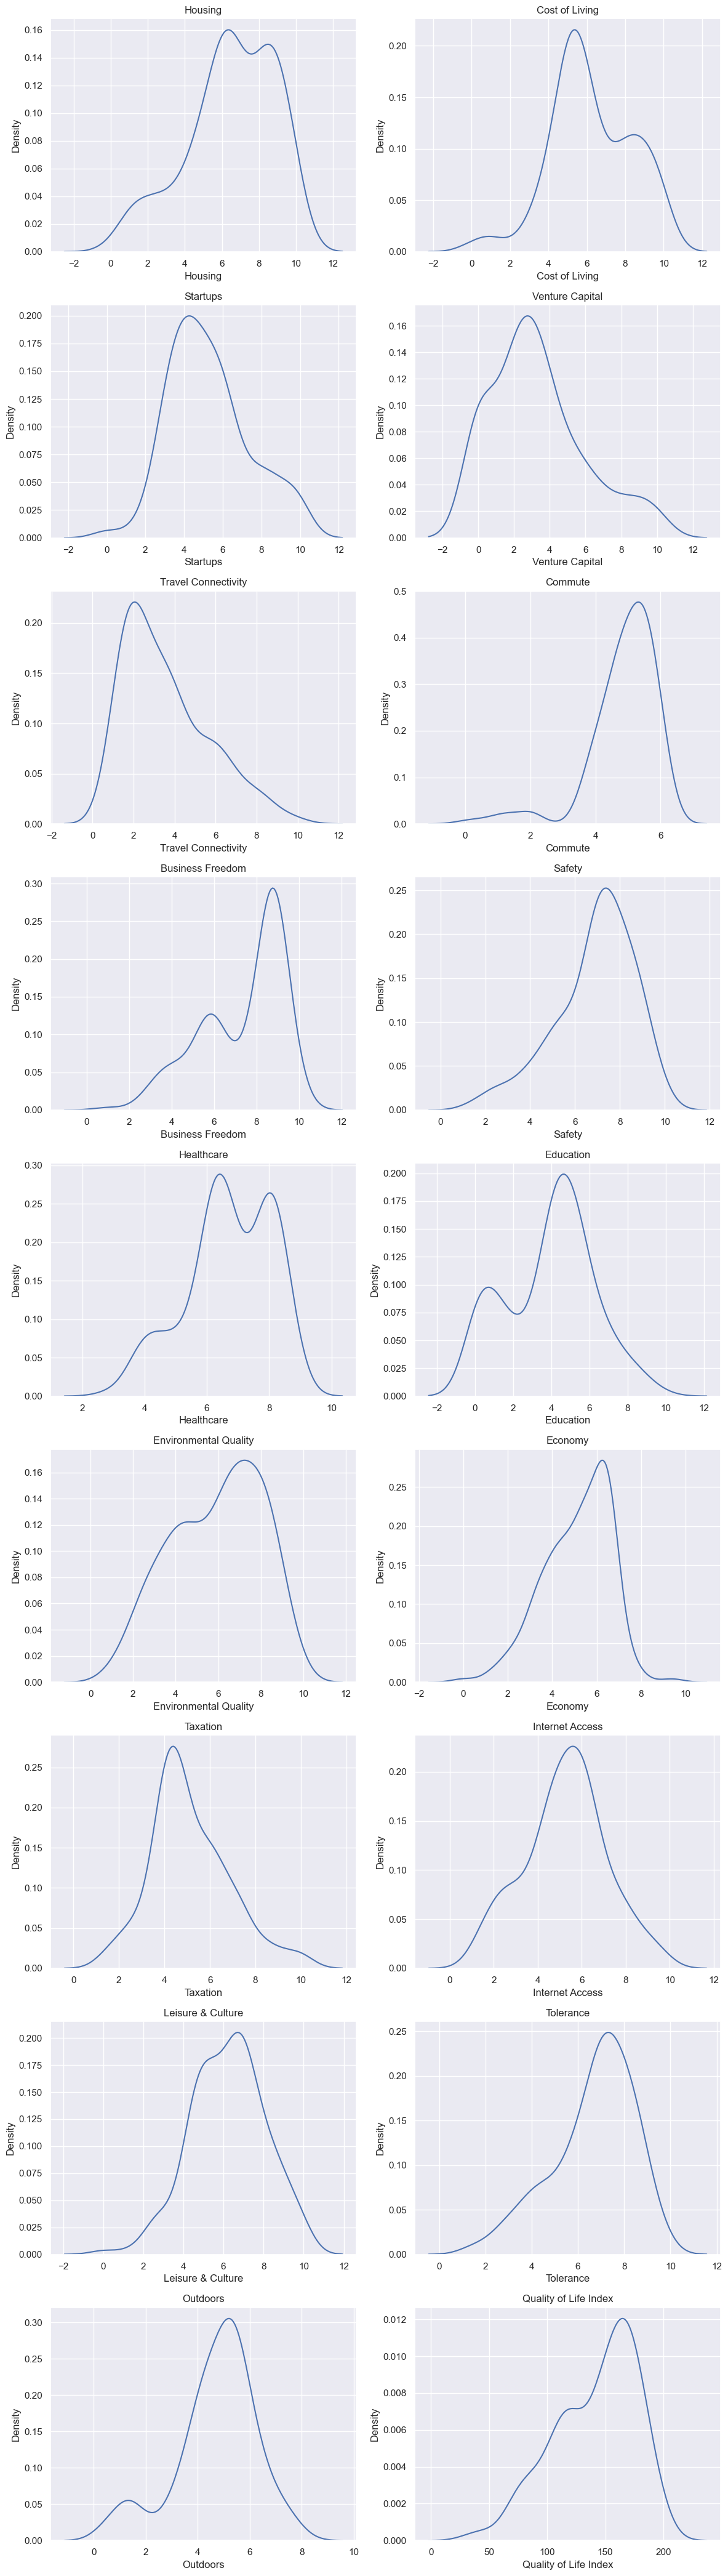

In [145]:
fig,ax = plt.subplots(9,2,figsize=(12,42))
column = df[numerical].columns

for col,axes in zip(column,ax.ravel()):
    sns.kdeplot(df[numerical][col],ax=axes).set(title=col)
    
plt.tight_layout()

In [146]:
x_corr = x
x_corr['target'] = df['Quality of Life Index']
x_corr.corr()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,target
Housing,1.000000,0.835347,-0.422283,-0.544934,-0.293691,0.053321,-0.592694,0.104502,-0.312218,-0.671270,-0.491254,-0.599117,0.040601,-0.327728,-0.151449,-0.218272,-0.265239,-0.478766
Cost of Living,0.835347,1.000000,-0.189456,-0.335346,-0.252162,0.009023,-0.729812,0.082542,-0.549788,-0.669702,-0.644051,-0.535714,0.065482,-0.387081,-0.080400,-0.365935,-0.194239,-0.641829
Startups,-0.422283,-0.189456,1.000000,0.768533,0.314257,-0.073944,0.200689,-0.153074,-0.105327,0.404855,0.038782,0.324143,-0.144869,0.151026,0.409144,-0.107459,0.246338,0.030528
Venture Capital,-0.544934,-0.335346,0.768533,1.000000,0.402359,-0.013279,0.267846,-0.115365,0.053052,0.587541,0.140074,0.409377,-0.206106,0.255171,0.328845,-0.104768,0.263502,0.140675
Travel Connectivity,-0.293691,-0.252162,0.314257,0.402359,1.000000,0.295973,0.166225,0.212772,0.318817,0.408567,0.042237,0.023553,-0.224209,0.233218,0.317767,-0.059592,0.129325,0.032186
Commute,0.053321,0.009023,-0.073944,-0.013279,0.295973,1.000000,0.184565,0.479003,0.422486,0.267287,0.221469,-0.086909,0.079615,0.163643,0.013701,0.374769,0.017985,0.180045
Business Freedom,-0.592694,-0.729812,0.200689,0.267846,0.166225,0.184565,1.000000,-0.040784,0.604082,0.726906,0.758425,0.628362,0.035933,0.481307,0.045940,0.428412,0.121911,0.794824
Safety,0.104502,0.082542,-0.153074,-0.115365,0.212772,0.479003,-0.040784,1.000000,0.289060,0.033296,0.073815,-0.213350,0.377007,0.003953,-0.082529,0.314483,0.029502,-0.013056
Healthcare,-0.312218,-0.549788,-0.105327,0.053052,0.318817,0.422486,0.604082,0.289060,1.000000,0.575393,0.574848,0.167774,-0.013104,0.321687,0.101435,0.519850,0.069250,0.586219
Education,-0.671270,-0.669702,0.404855,0.587541,0.408567,0.267287,0.726906,0.033296,0.575393,1.000000,0.595425,0.525027,-0.114879,0.500145,0.253026,0.267459,0.205798,0.566568


<Axes: >

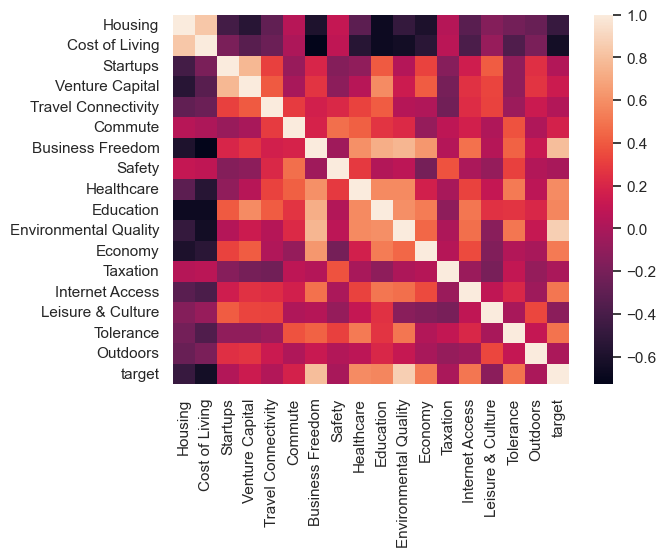

In [147]:
sns.heatmap(x_corr.corr())

In [148]:
LinReg = LinearRegression()
LinReg.fit(train_x, train_y)

LinearRegression()

In [149]:
r2_score(LinReg.predict(test_x), test_y)

0.6897749958682846

Результат неплохой, но думаю с помощью отбора признаков можно ещё улучшить модель

In [150]:
from sklearn.feature_selection import f_regression, SelectKBest

In [151]:
f_statistic, p_values = f_regression(train_x, train_y)
sekector = SelectKBest(f_regression, k=10)
sekector.fit_transform(train_x, train_y)

C:\PerfLogs\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\PerfLogs\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[6.7295 , 5.522  , 5.09725, ..., 5.8405 , 4.61   , 7.9255 ],
       [7.156  , 5.595  , 4.42125, ..., 6.5145 , 5.4765 , 4.7755 ],
       [8.631  , 6.301  , 5.49125, ..., 2.9955 , 2.6545 , 7.5055 ],
       ...,
       [2.1315 , 6.183  , 4.61625, ..., 9.39   , 3.245  , 5.0625 ],
       [4.9025 , 9.82   , 4.54425, ..., 1.978  , 1.6415 , 4.5505 ],
       [8.6965 , 7.806  , 4.75325, ..., 7.042  , 4.13   , 2.909  ]])

In [152]:
names_f = sekector.get_feature_names_out()
names_f

array(['Housing', 'Cost of Living', 'Commute', 'Business Freedom',
       'Healthcare', 'Education', 'Environmental Quality', 'Economy',
       'Internet Access', 'Tolerance'], dtype=object)

In [153]:
x = x[names_f]
y = df[["Quality of Life Index"]]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

LinReg = LinearRegression()
LinReg.fit(train_x, train_y)

LinearRegression()

In [154]:
r2_score(LinReg.predict(test_x), test_y)

0.6907504463253369

# Результат особо не изменился, поэтому вернёмся к изначальному датасету и закодируем категориальные признаки 

In [155]:
df.head(3)

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41


In [156]:
from sklearn.preprocessing import OneHotEncoder

In [157]:
target = df['Quality of Life Index']
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42)

In [158]:
all_columns = X_train.columns.values
categorical = ['UA_Name', 'UA_Country', 'UA_Continent']

non_categorical = [value for value in all_columns if value not in categorical]

In [159]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[categorical])

features_name = enc.get_feature_names_out(categorical)

X_train[features_name] =  enc.transform(X_train[categorical]).toarray()
X_train = X_train.drop(categorical, axis=1)

X_test[features_name] = enc.transform(X_test[categorical]).toarray()
X_test = X_test.drop(categorical, axis=1)

C:\Users\Артур\AppData\Local\Temp\ipykernel_3332\1105655237.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[features_name] =  enc.transform(X_train[categorical]).toarray()
C:\Users\Артур\AppData\Local\Temp\ipykernel_3332\1105655237.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[features_name] =  enc.transform(X_train[categorical]).toarray()
C:\Users\Артур\AppData\Local\Temp\ipykernel_3332\1105655237.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[non_categorical] = scaler.fit_transform(X_train[non_categorical])
X_test[non_categorical] = scaler.transform(X_test[non_categorical])

In [161]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
LinReg.score(X_test, y_test)

0.9832631502971942

# Результат нас более чем устраивает 